In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

def perform_neural_network_classification(csv_file_path):
    """
    Performs neural network binary classification on a dataset, calculates
    various classification metrics, generates a confusion matrix heatmap,
    and saves the metrics to an Excel file.

    Args:
        csv_file_path (str): The path to the CSV file. All columns except the last
                             are treated as features (X), and the last column,
                             which should contain 0s and 1s, is the target variable (y).
    """
    try:
        # Load the dataset
        df = pd.read_csv(csv_file_path)

        # Separate features (X) and target (y)
        X = df.iloc[:, :-1]  # All columns except the last
        y = df.iloc[:, -1]   # The last column (0 or 1)

        # Split the data into training and testing sets (80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Standardize the data to help the neural network converge faster
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # --- Neural Network Model Setup ---
        # Define a sequential neural network model
        model = Sequential()
        
        # Input layer and first hidden layer with 64 neurons and ReLU activation
        model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        
        # Dropout layer to prevent overfitting
        model.add(Dropout(0.3))
        
        # Second hidden layer with 32 neurons and ReLU activation
        model.add(Dense(32, activation='relu'))
        
        # Output layer for binary classification with a single neuron and sigmoid activation
        # Sigmoid function squashes the output to a probability between 0 and 1
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model with the Adam optimizer and binary cross-entropy loss
        # Binary cross-entropy is the standard loss function for binary classification
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        
        # Print the model summary
        print("Model Summary:")
        model.summary()
        
        # Train the model
        print("\nTraining Neural Network model...")
        history = model.fit(
            X_train_scaled, y_train,
            epochs=50,  # Number of training epochs
            batch_size=32,
            validation_split=0.2,  # Use 20% of the training data for validation
            verbose=1  # Show training progress
        )
        
        # --- Make Predictions ---
        # The model predicts a probability. We round it to get a binary class (0 or 1).
        y_pred_proba = model.predict(X_test_scaled)
        y_pred = (y_pred_proba > 0.5).astype("int32").flatten()

        # --- 1. Calculate Classification Metrics ---
        print("\n--- Neural Network Model Performance Metrics ---")

        # Accuracy Score
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Classification Report (Precision, Recall, F1-Score)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # ROC AUC Score
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC Score: {roc_auc:.4f}")

        # --- 2. Save Metrics to Excel ---
        # Create a dictionary to hold the metrics
        metrics_data = {
            'Metric': ['Accuracy', 'ROC AUC Score'],
            'Value': [accuracy, roc_auc]
        }
        
        metrics_df = pd.DataFrame(metrics_data)
        excel_path = 'nn_classification_performance.xlsx'
        metrics_df.to_excel(excel_path, index=False)
        print(f"\nModel performance metrics saved to '{excel_path}'")

        # --- 3. Generate Confusion Matrix Plot ---
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(8, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        
        plot_path = 'confusion_matrix.svg'
        plt.savefig(plot_path, format='svg')
        print(f"\nConfusion matrix plot saved to '{plot_path}'")
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")



Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Training Neural Network model...
Epoch 1/50


200/200 [==============================] - 4s 6ms/step - loss: 0.6999 - accuracy: 0.5003 - 

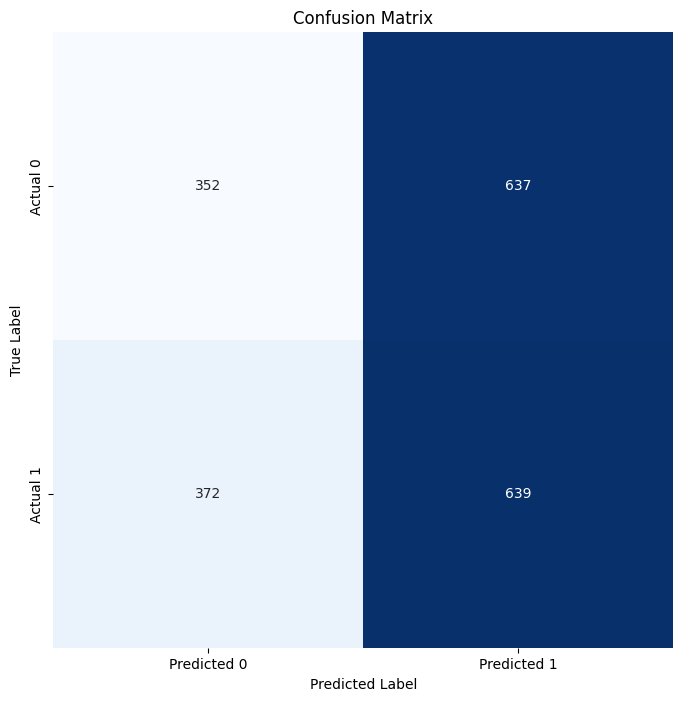

In [2]:
perform_neural_network_classification("../mapped_dataset_Normalized_version.csv")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, r2_score, mean_squared_error, mean_absolute_error,
    mean_absolute_percentage_error, mean_squared_log_error
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

def perform_neural_network_classification(csv_file_path):
    """
    Performs neural network binary classification on a dataset, calculates
    various classification and regression metrics, generates a confusion
    matrix heatmap, and saves all metrics to an Excel file.

    Args:
        csv_file_path (str): The path to the CSV file. All columns except the last
                             are treated as features (X), and the last column,
                             which should contain 0s and 1s, is the target variable (y).
    """
    try:
        # Load the dataset
        df = pd.read_csv(csv_file_path)

        # Separate features (X) and target (y)
        X = df.iloc[:, :-1]  # All columns except the last
        y = df.iloc[:, -1]   # The last column (0 or 1)

        # Split the data into training and testing sets (80/20 split)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        # Standardize the data to help the neural network converge faster
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # --- Neural Network Model Setup ---
        # Define a more complex sequential neural network model
        model = Sequential()
        
        # Input layer and first hidden layer with 128 neurons and ReLU activation
        model.add(Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        
        # Dropout layer to prevent overfitting
        model.add(Dropout(0.4))
        
        # Second hidden layer with 64 neurons and ReLU activation
        model.add(Dense(64, activation='relu'))
        
        # Output layer for binary classification with a single neuron and sigmoid activation
        model.add(Dense(1, activation='sigmoid'))

        # Compile the model with the Adam optimizer and binary cross-entropy loss
        model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
        
        # Print the model summary
        print("Model Summary:")
        model.summary()
        
        # Train the model with more epochs
        print("\nTraining Neural Network model...")
        history = model.fit(
            X_train_scaled, y_train,
            epochs=100,  # Increased number of training epochs
            batch_size=32,
            validation_split=0.2,  # Use 20% of the training data for validation
            verbose=1  # Show training progress
        )
        
        # --- Make Predictions ---
        # The model predicts a probability. We round it to get a binary class (0 or 1).
        y_pred_proba = model.predict(X_test_scaled).flatten()
        y_pred = (y_pred_proba > 0.5).astype("int32")

        # --- 1. Calculate Classification Metrics ---
        print("\n--- Neural Network Model Performance Metrics ---")

        # Accuracy Score
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")

        # Classification Report (Precision, Recall, F1-Score)
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

        # ROC AUC Score
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f"ROC AUC Score: {roc_auc:.4f}")
        
        # --- 2. Calculate Regression Metrics on Probabilities ---
        print("\n--- Regression Metrics on Predicted Probabilities ---")

        # R-squared (Coefficient of Determination)
        r2 = r2_score(y_test, y_pred_proba)
        print(f"R-squared (R2): {r2:.4f}")

        # Mean Absolute Error (MAE)
        mae = mean_absolute_error(y_test, y_pred_proba)
        print(f"Mean Absolute Error (MAE): {mae:.4f}")

        # Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred_proba)
        print(f"Mean Squared Error (MSE): {mse:.4f}")

        # Root Mean Squared Error (RMSE)
        rmse = np.sqrt(mse)
        print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

        # Mean Absolute Percentage Error (MAPE)
        # Add a small epsilon to avoid division by zero
        mape = np.mean(np.abs((y_test - y_pred_proba) / (y_test + 1e-8))) * 100
        print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

        # Mean Squared Log Error (MSLE) - check for negative values
        # Add a small value to predictions to avoid log(0)
        msle = mean_squared_log_error(y_test + 1e-8, y_pred_proba + 1e-8)
        print(f"Mean Squared Log Error (MSLE): {msle:.4f}")

        # --- 3. Save Metrics to Excel ---
        # Create a dictionary to hold the metrics
        metrics_data = {
            'Metric': ['Accuracy', 'ROC AUC', 'R2 Score', 'MAE', 'MSE', 'RMSE', 'MAPE', 'MSLE'],
            'Value': [accuracy, roc_auc, r2, mae, mse, rmse, mape, msle]
        }
        
        metrics_df = pd.DataFrame(metrics_data)
        excel_path = 'nn_performance_metrics.xlsx'
        metrics_df.to_excel(excel_path, index=False)
        print(f"\nModel performance metrics saved to '{excel_path}'")

        # --- 4. Generate Confusion Matrix Plot ---
        cm = confusion_matrix(y_test, y_pred)
        
        plt.figure(figsize=(8, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Predicted 0', 'Predicted 1'],
                    yticklabels=['Actual 0', 'Actual 1'])
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        
        plot_path = 'confusion_matrix.svg'
        plt.savefig(plot_path, format='svg')
        print(f"\nConfusion matrix plot saved to '{plot_path}'")
        plt.show()

    except FileNotFoundError:
        print(f"Error: The file '{csv_file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")


In [ ]:
perform_neural_network_classification("../mapped_dataset_Normalized_version.csv")

Model Summary:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               1792      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Training Neural Network model...
Epoch 1/100
200/200 [==============================] - 3s 5ms/step - loss: 0.7022 - accuracy: 0.4981 